# 1. Extracting labels from the image names

0. copy the folder with images into the directory of current Jupyter Notebook
1. get the name of the main directory
2. get the files names in the main directory and find the folder name with the dataset
3. get the  subfolder names of our dataset (they give the image classes)
4. get the names of each image from each subfolder
5. extract the image label from the image name
6. create a DataFrame df_labels

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
import cv2
%matplotlib inline


In [2]:
# 1. Getting the main directory path
cwd = os.getcwd()
cwd

'/Users/anastasiya/Documents/JupyterBooks/Blood_Cell_Classification'

In [3]:
# 2. Getting all the file names in the main directory path ans finding our dataset folder
os.listdir(cwd)

['Untitled1.ipynb',
 '.DS_Store',
 'Untitled.ipynb',
 'Blood_Cell_Classification_LeNet_AT.ipynb',
 'datasets.py',
 'BCC_DataExploration_AT.ipynb',
 'DC09-Modelisation-2.ipynb',
 'Untitled2.ipynb',
 '__pycache__',
 'BCC_TransferLearning_AT_v1.ipynb',
 'Blood_Cell_Classification_TransferLearning_AT.ipynb',
 'PBC_dataset_normal_DIB',
 '.ipynb_checkpoints',
 'Barcelona Dataset.ipynb',
 'BCC_TL_VGG16_AT.ipynb',
 'data']

In [4]:
# The directory with our dataset is 'PBC_dataset_normal_DIB'.
path='PBC_dataset_normal_DIB'
# 3. Getting the  subfolder names of our dataset (they give the image classes)
folder=os.listdir(path)
folder

['basophil',
 'neutrophil',
 '.DS_Store',
 'ig',
 'monocyte',
 'eosinophil',
 'erythroblast',
 'lymphocyte',
 'platelet']

In [5]:
### The '.DS_Store' is not a folder with the images, I take it out of the data list.
folder.pop(2) 
folder

['basophil',
 'neutrophil',
 'ig',
 'monocyte',
 'eosinophil',
 'erythroblast',
 'lymphocyte',
 'platelet']

In [6]:
# 4. extract the image label from the image name

#Creating a list containing the names of all images and the list containing the classes
file_name=[]
cl=[] 
for i in range (len(folder)):
    p=os.path.join(path,folder[i])
    l=os.listdir(p)
    file_name.extend(l) 
    cl.extend([folder[i]]*len(l)) 

#l=os.listdir(path+'/'+folder[i]

# 2. Creation of a DataFrame with image file names and their labels

In [7]:
import cv2
df_labels=pd.DataFrame()
df_labels['FileName']=file_name
df_labels['Class']=cl
df_labels['Labels']=df_labels['FileName'].str.split('_', expand=True)[0]
df_labels['ID']=df_labels['FileName'].str.split('_', expand=True)[1].apply(lambda x : x[:-4]).astype('int')
df_labels['format']=df_labels['FileName'].str.split('_', expand=True)[1].apply(lambda x : x[-3:])
df_labels['ImagePath']=[os.path.join(cwd, path, df_labels['Class'][i],df_labels['FileName'][i]) for i in range(len(df_labels['FileName']))]

df_labels.head()



FileName     Class Labels      ID format  \
0  BA_689200.jpg  basophil     BA  689200    jpg   
1  BA_883452.jpg  basophil     BA  883452    jpg   
2  BA_382161.jpg  basophil     BA  382161    jpg   
3  BA_175579.jpg  basophil     BA  175579    jpg   
4  BA_775722.jpg  basophil     BA  775722    jpg   

                                           ImagePath  
0  /Users/anastasiya/Documents/JupyterBooks/Blood...  
1  /Users/anastasiya/Documents/JupyterBooks/Blood...  
2  /Users/anastasiya/Documents/JupyterBooks/Blood...  
3  /Users/anastasiya/Documents/JupyterBooks/Blood...  
4  /Users/anastasiya/Documents/JupyterBooks/Blood...

In [8]:
df_labels.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17093 entries, 0 to 17092
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   FileName   17093 non-null  object
 1   Class      17093 non-null  object
 2   Labels     17093 non-null  object
 3   ID         17093 non-null  int64 
 4   format     17093 non-null  object
 5   ImagePath  17093 non-null  object
dtypes: int64(1), object(5)
memory usage: 801.4+ KB


In [9]:
df_labels.groupby(['Class'])['Labels'].value_counts()

Class         Labels    
basophil      BA            1218
eosinophil    EO            3117
erythroblast  ERB           1551
ig            MY            1137
              MMY           1015
              PMY            592
              IG             151
lymphocyte    LY            1214
monocyte      MO            1420
neutrophil    SNE           1646
              BNE           1633
              NEUTROPHIL      50
              .DS              1
platelet      PLATELET      2348
Name: Labels, dtype: int64

In [10]:
df_labels['Labels'].value_counts()

EO            3117
PLATELET      2348
SNE           1646
BNE           1633
ERB           1551
MO            1420
BA            1218
LY            1214
MY            1137
MMY           1015
PMY            592
IG             151
NEUTROPHIL      50
.DS              1
Name: Labels, dtype: int64

In [11]:
ds=df_labels[df_labels['Labels']=='.DS']
ds

FileName       Class Labels      ID format  \
3962  .DS_169665.jpg  neutrophil    .DS  169665    jpg   

                                              ImagePath  
3962  /Users/anastasiya/Documents/JupyterBooks/Blood...

In [12]:
df_labels= pd.DataFrame(df_labels[df_labels['Labels'] != '.DS'])
#df_labels['Labels'].replace('.DS','NEUTROPHIL',inplace=True)
#df_labels['Labels'].iloc[3962]

In [13]:
H=[]
W=[]
C=[]


for i in range (len(df_labels['ImagePath'])):
    
    h,w,c =cv2.imread(df_labels['ImagePath'].iloc[i]).shape
    W.append(w)
    H.append(h)
    C.append(c)
    
#w= [cv2.imread(df_labels['ImagePath'][i]).shape[0] for i in range (len(df_labels['FileName']))]
    #h,w,c=im.shape
    #H.append(im.shape[0])
    #W.append(im.shape[1])
    #C.append(im.shape[2])
    
df_labels['Width']=W
df_labels['Height']=H
df_labels['ChannelNum']=C
df_labels.head()

#df_labels['height'], df_labels['width'],df_labels['channelNum']



FileName     Class Labels      ID format  \
0  BA_689200.jpg  basophil     BA  689200    jpg   
1  BA_883452.jpg  basophil     BA  883452    jpg   
2  BA_382161.jpg  basophil     BA  382161    jpg   
3  BA_175579.jpg  basophil     BA  175579    jpg   
4  BA_775722.jpg  basophil     BA  775722    jpg   

                                           ImagePath  Width  Height  \
0  /Users/anastasiya/Documents/JupyterBooks/Blood...    360     363   
1  /Users/anastasiya/Documents/JupyterBooks/Blood...    360     363   
2  /Users/anastasiya/Documents/JupyterBooks/Blood...    366     369   
3  /Users/anastasiya/Documents/JupyterBooks/Blood...    360     363   
4  /Users/anastasiya/Documents/JupyterBooks/Blood...    360     363   

   ChannelNum  
0           3  
1           3  
2           3  
3           3  
4           3

# 3. Plotting the class and  label distribution

Text(0.5, 1.0, 'Class distribution')

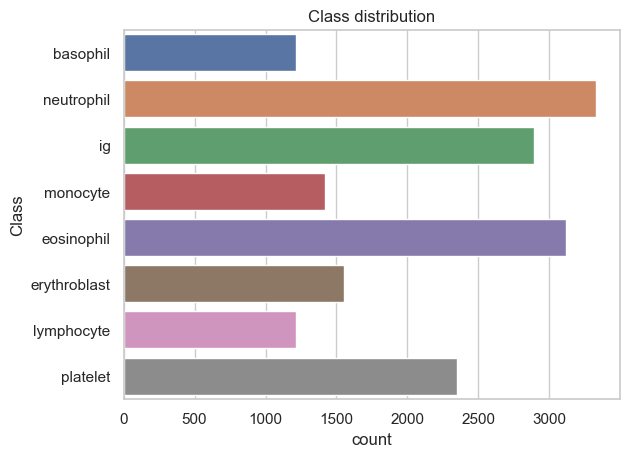

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc('font', size=25)
sns.set(style="whitegrid")
sns.countplot(y=df_labels['Class'])
plt.title('Class distribution')
#plt.rcParams['font.size'] = 50;

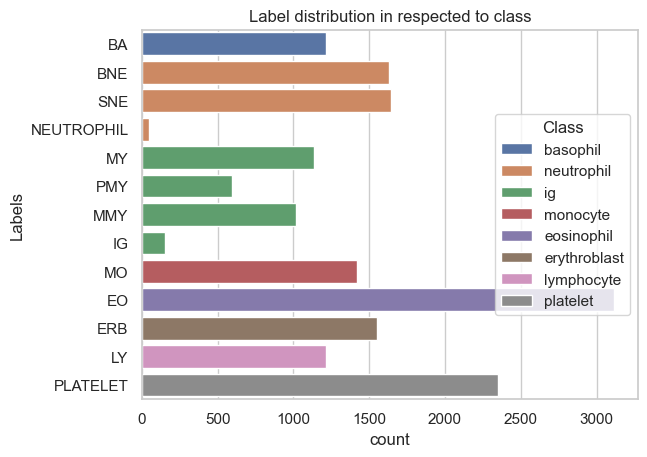

In [15]:

sns.countplot(y=df_labels['Labels'], hue=df_labels['Class'],dodge=False);
plt.title('Label distribution in respected to class');

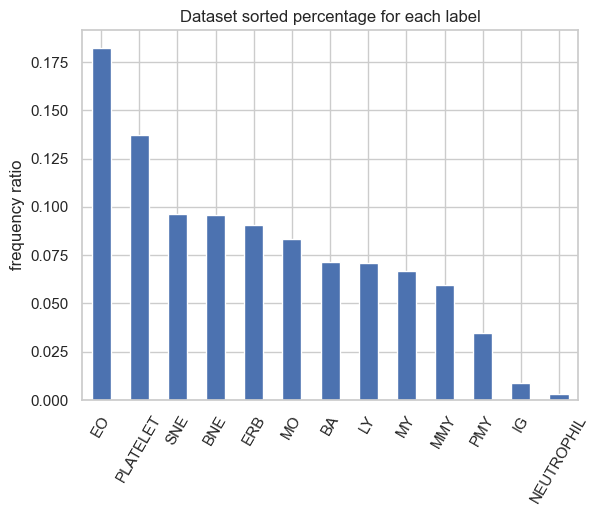

In [16]:
df_labels['Labels'].value_counts(normalize=True).plot(kind='bar',
                                                      rot=60, ylabel='frequency ratio',
                                                      title='Dataset sorted percentage for each label');


<AxesSubplot:xlabel='Width', ylabel='Height'>

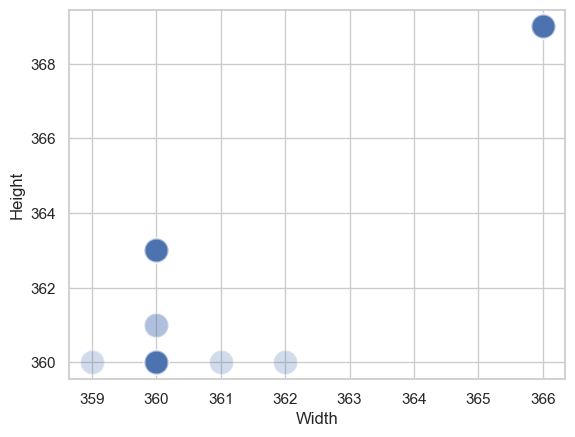

In [17]:
fig=plt.figure
sns.scatterplot(data=df_labels,x='Width',y='Height', s=300, alpha=0.25)



In [18]:
df_labels.groupby(['Width'])['Height'].value_counts()

Width  Height
359    360           1
360    363       16639
       360         198
       361           2
361    360           1
362    360           1
366    369         250
Name: Height, dtype: int64

In [19]:
df_labels['format'].value_counts()

jpg    17092
Name: format, dtype: int64

# Data overview conclusions:

- In the dataset of 17092 images there are 8 classes: 'basophil','neutrophil','ig','monocyte','eosinophil','erythroblast','lymphocyte','platelet'.
- Class "neutrophil" has 3 types of labels: "BNE","SNE",and "Neutrophil".
- Class "ig" has 4 types of labels: "MY", "PMY", "MMY", "IG".
- Each other class has only 1 type of the labels.
- All images have the same format.
- The images are of different sizes. There are 16639 images with a size of 363x360 (hxw), 250 images of 369x366, 201 images of 360x360, 2 images of 361x360, 1 image of 360x359, 1 image of 360x362, 1 image 360x361. 
- __The data is unbalanced__ 

# 4. Image Visualization

## 4.1. Visualization of each class

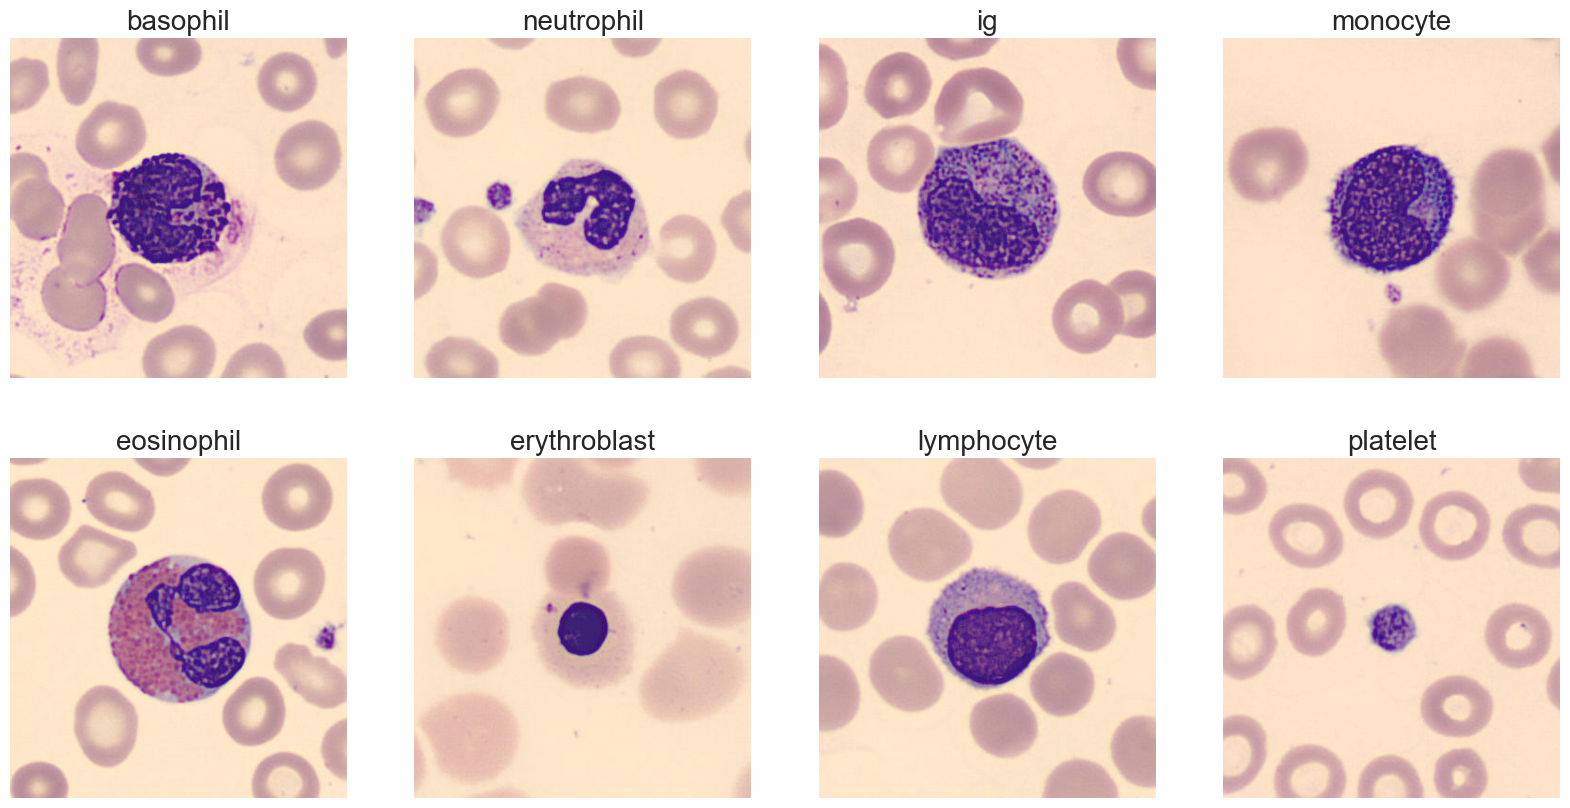

In [20]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

# finding all unique classes
cls=df_labels['Class'].unique()

# getting the ImagePath for each first image in respective class
img=[]
for i in cls:
    p=df_labels['ImagePath'].loc[df_labels['Class']==i].head(1)
    img.extend(p) 

# Plotting the retrieved images
fig = plt.figure(figsize=(20,10))
for i in range(len(img)):
    ax = fig.add_subplot(2, 4, i+1)
    image = mpimg.imread(img[i])
    plt.imshow(image)
    ax.set_title(cls[i], fontsize = 20)    
    ax.axis('off')
    
    #ax.grid(False)
    #ax.set_xticks([])
    #ax.set_yticks([])

## 4.2. Visualization of the class 'neutrophil' (there are 3 different labels)


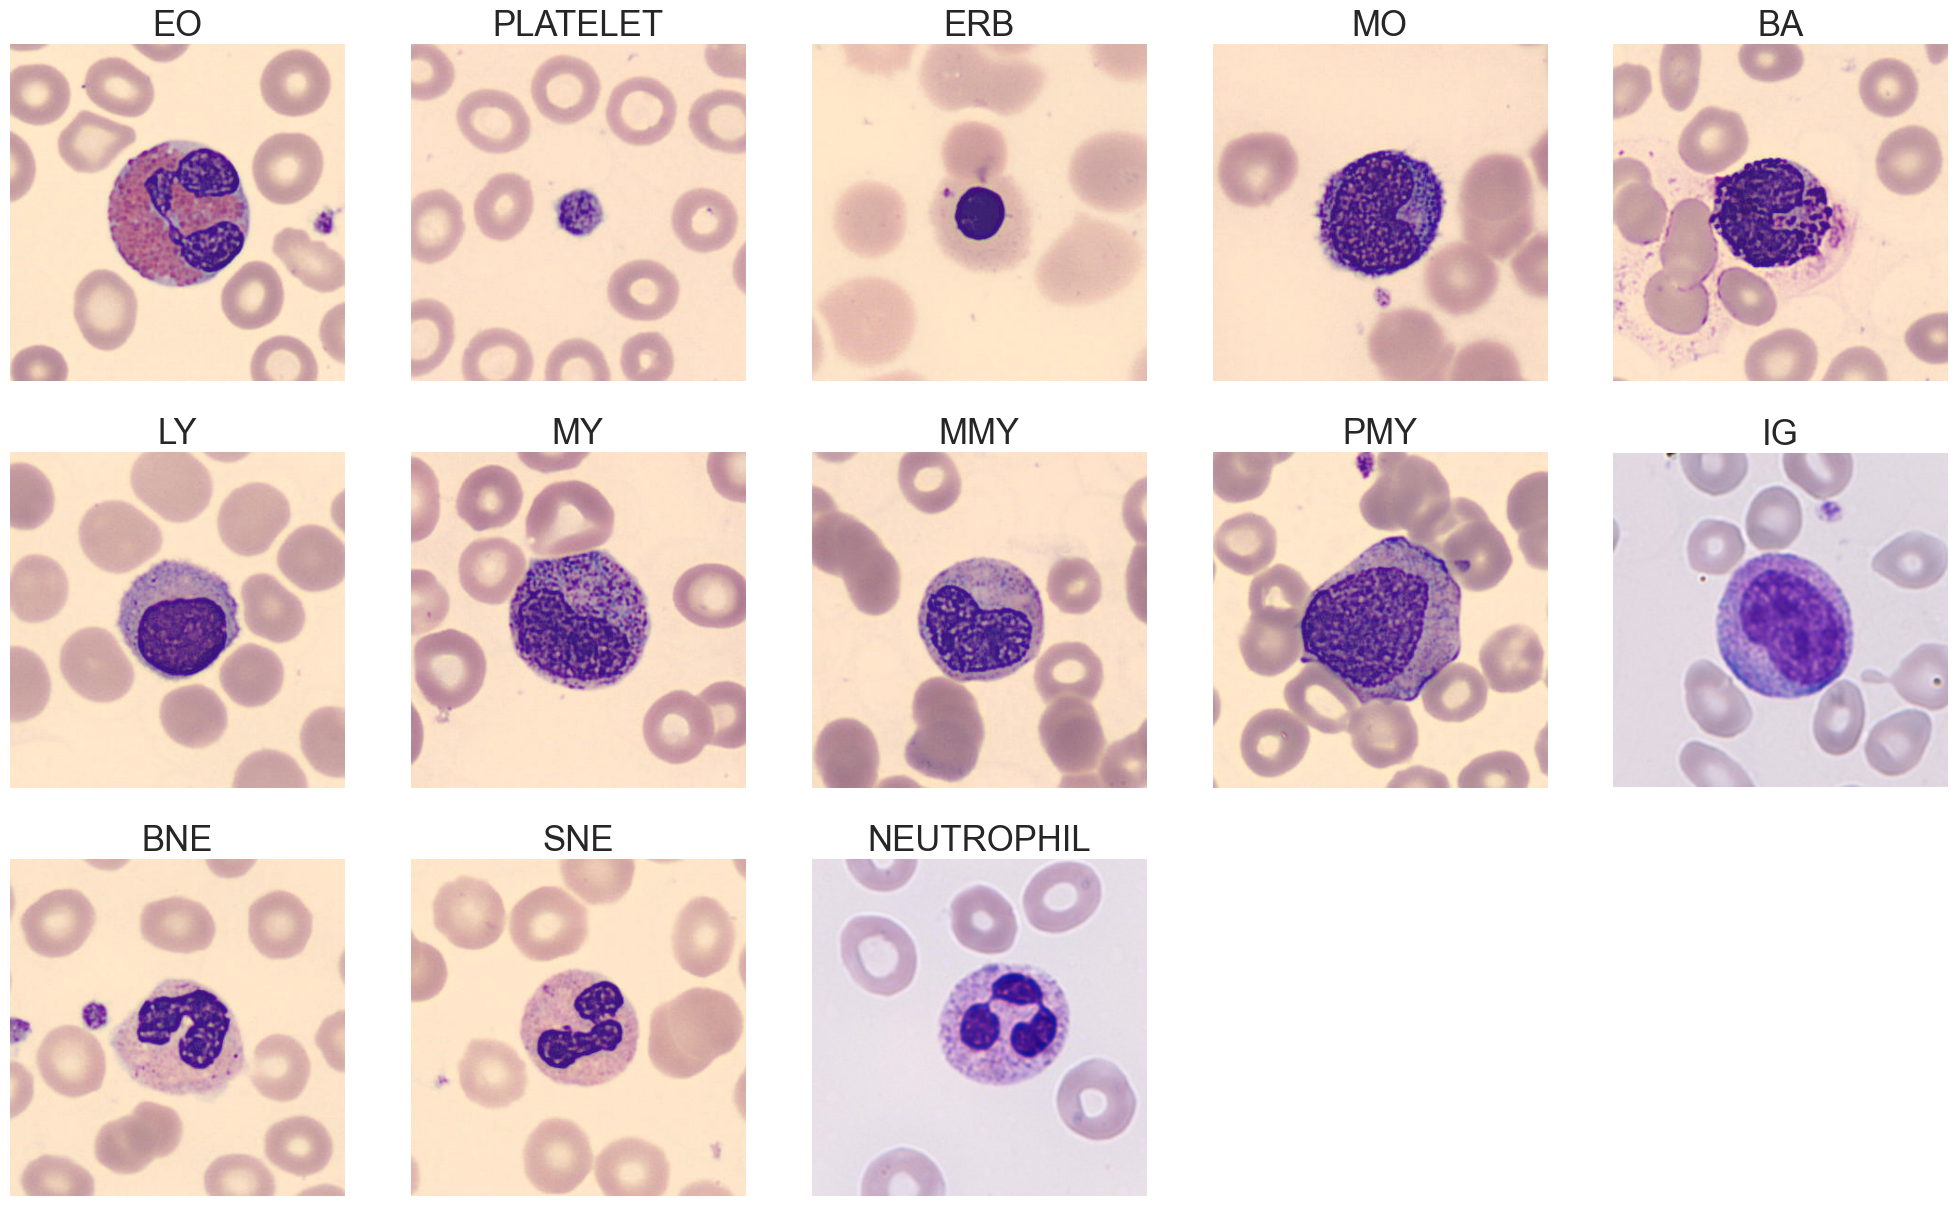

In [35]:
# getting path to the images
lbs=['EO','PLATELET','ERB','MO','BA','LY','MY','MMY','PMY','IG','BNE','SNE','NEUTROPHIL'] # image labels
img_n=[]
for i in lbs:
    p=df_labels['ImagePath'].loc[df_labels['Labels']==i].head(1)
    img_n.extend(p) 
img_n

# reading images
I_N=[cv2.imread(im) for im in img_n]

# plotting images
fig = plt.figure(figsize=(25,15)) 
for i in range(len(I_N)):     
    plt.subplot(3,5,i+1)
    plt.imshow(cv2.cvtColor(I_N[i],cv2.COLOR_BGR2RGB))
    plt.title(lbs[i], fontsize = 25)
    plt.axis('off')
    
plt.show()

In [ ]:
# getting path to the images
lbs=['BNE','SNE','NEUTROPHIL'] # image labels
img_n=[]
for i in lbs:
    p=df_labels['ImagePath'].loc[df_labels['Labels']==i].head(1)
    img_n.extend(p) 
img_n

# reading images
I_N=[cv2.imread(im) for im in img_n]

# plotting images
fig = plt.figure(figsize=(15,10)) 
for i in range(len(I_N)):     
    plt.subplot(1,len(I_N),i+1)
    plt.imshow(cv2.cvtColor(I_N[i],cv2.COLOR_BGR2RGB))
    plt.title(lbs[i], fontsize = 15)
    plt.axis('off')
    
plt.show()

## 4.3. Visualization of the class 'ig' (there are 4 different labels)

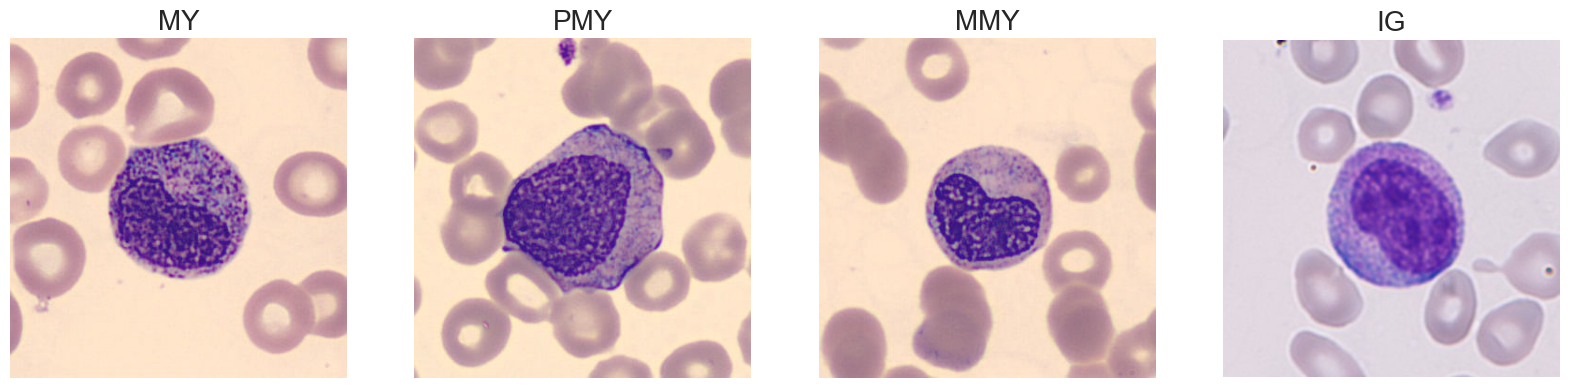

In [22]:
# getting path to the images
lbs_ig=['MY', 'PMY', 'MMY', 'IG'] # image labels
img_ig=[]
for k in lbs_ig:
    p=df_labels['ImagePath'].loc[df_labels['Labels']==k].head(1)
    img_ig.extend(p) 


# reading images
I_IG=[cv2.imread(im) for im in img_ig]

# plotting images
fig = plt.figure(figsize=(20,10)) 
for j in range(len(I_IG)):     
    plt.subplot(1,4,j+1)
    plt.imshow(cv2.cvtColor(I_IG[j],cv2.COLOR_BGR2RGB))
    plt.title(lbs_ig[j], fontsize = 20)
    plt.axis('off')
 
plt.show()

# 5. Plotting the intensity histograms for each color channel for each class

> The dataset consists of __RGB images__ (color images). Color images are split into luminance and chrominance. The luminance is the grayscale portion and is usually processed in many applications. Histograms are used in grayscale images.A histogram counts the number of occurrences of the intensity values of pixels, and it's a useful tool for understanding and manipulating images. I use __cv2.calcHist()__ to generate the histogram. 

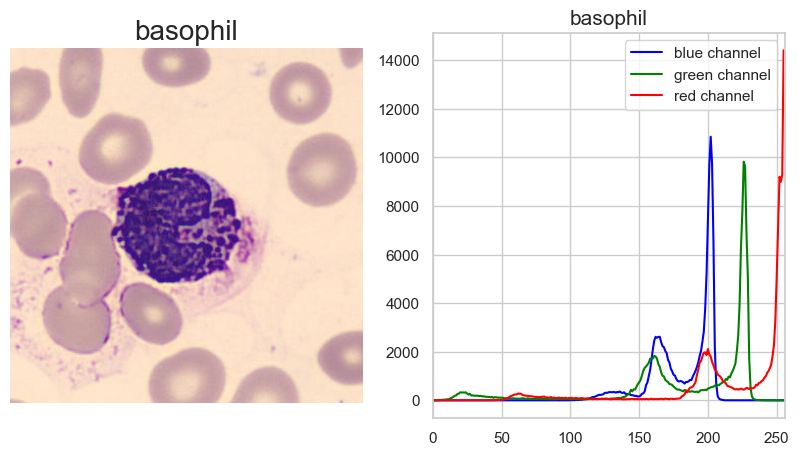

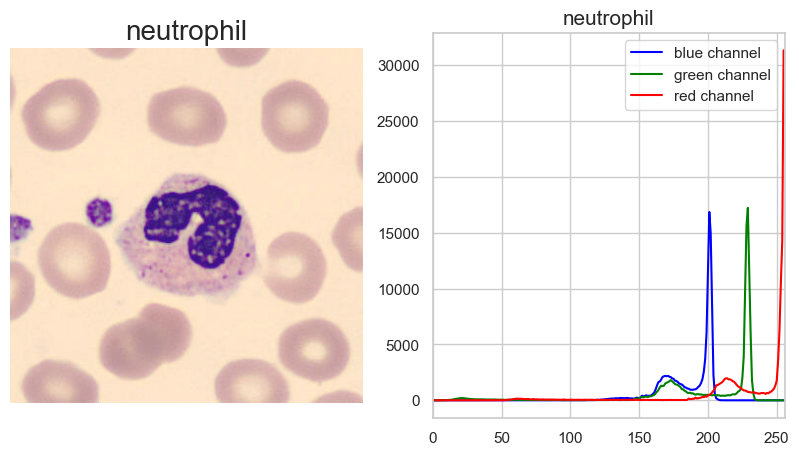

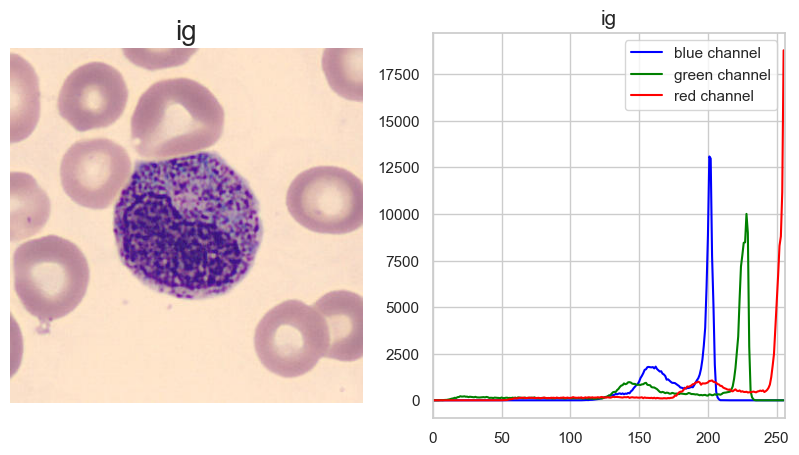

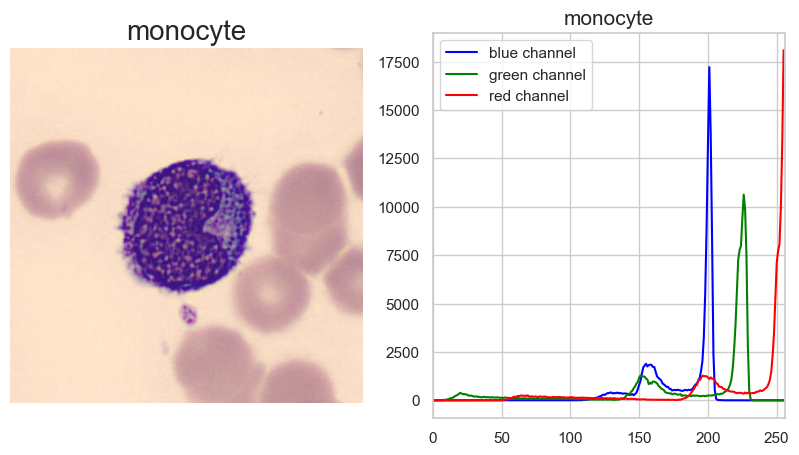

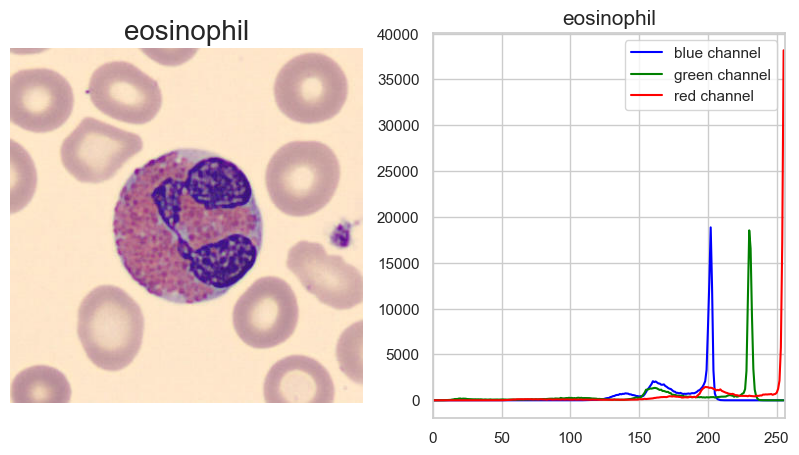

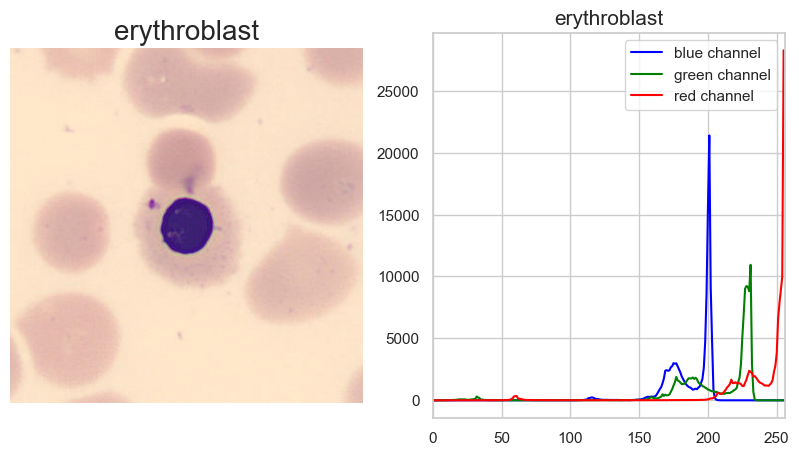

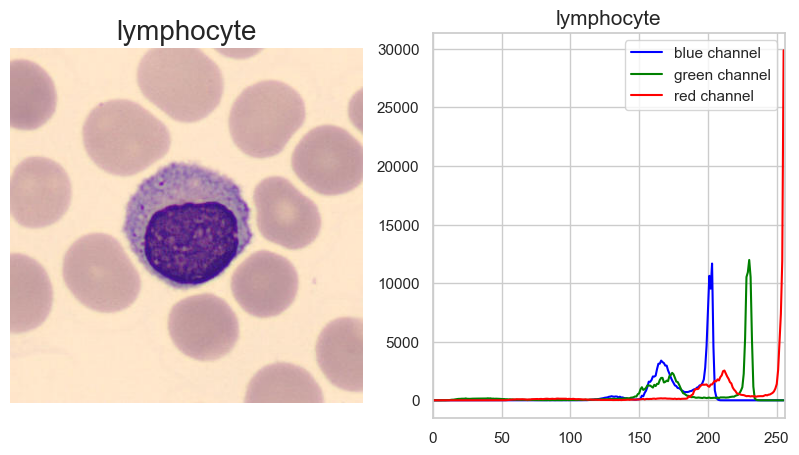

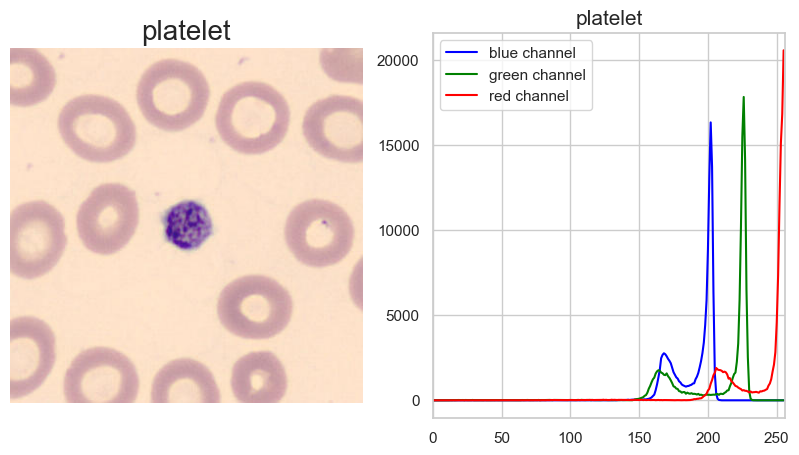

In [23]:
# reading images that was 
I=[cv2.imread(im)for im in img]
# plotting figure with 2 subfigures
for j in range(len(I)):
    
    plt.figure(figsize=(10,5))
    # image of a cell
    plt.subplot(1,2,1)
    plt.imshow(cv2.cvtColor(I[j],cv2.COLOR_BGR2RGB))
    plt.title(cls[j], fontsize = 20)
    plt.axis('off')

    plt.subplot(1,2,2)
    # plot of the intensity histogram for 3 channels
    color = ('blue','green','red')
    for i,col in enumerate(color):
        histr = cv2.calcHist([I[j]],[i],None,[256],[0,256])
        intensity_values = np.array([x for x in range(histr.shape[0])])
        plt.plot(intensity_values,histr,color = col,label=col+" channel")
        plt.xlim([0,256])
        
    plt.legend()
    plt.title(cls[j], fontsize = 15)
    
    plt.show()